# Accuracy of Medical Tests

## Intro

In this study, we will be trying to find how accurate COVID-19, flu, and strep throat tests are. Personally, I fell for strep throat a lot when I was a kid so I wonder how accurate the strep throat tests are. This is an important topic to talk about in medicine because false information leads to false diagnoses, leading to incorrect treatment, leading to possibly more major risks than what the patient started with. We will use a mathematical formula to find out the positive predictive value of each test. We will graph this on a bar graph using Python and find out which test is the most accurate.

## Big Question

How accurate are medical tests?

## Research

When doctors test for viruses or bacteria(ex: COVID 19, flu, or strep), the doctors rarely deal with perfect tests. Every test has a factor, to their ability to correctly identify people with a disease, called sensitivity. Another is specificity, the ability to correctly identify people who don't have a disease. Sensitivity matters in tests because it can be very dangerous if there was a false positive because that information leads the doctor into making an incorrect diagnosis. Because viruses and bacteria can low prevalence(means that only a small portion of the population is infected at a given time), even a test that has a 95% sensitivity and/or specificity can produce many false positives. In medical practice, tests differ by type(PCR, antigen, culture, antibody), sample, quality, and timing(how early or late the test is taken after infection) all affect sensitivity and specificity in real use.

Here's a chart of what the internet says are the sensitivity, specificity, and prevalence of strep throat, flu, and COVID-19 tests:

# Diagnostic Test Performance Comparison

| Disease      | Test Type             | Sensitivity (%) | Specificity (%) | Prevalence Estimate |
|--------------|----------------------|----------------|----------------|-------------------|
| Strep Throat | Rapid Antigen Test  | 86             | 95             | ~15%              |
| Influenza    | Rapid Antigen Test  | 50–70          | 95–99          | ~5–10%            |
| COVID-19     | Rapid Antigen Test  | 47–80          | 99.1–99.5      | ~1–10%            |

      

## Formula

The mathematical formula we will use in this experiment is the positive predictive value(PPV) formula. This formula calculates the probability a person actually has the disease given that they tested positive for. It depends not only on sensitivity and specificity, but also on disease prevalence. Using Bayes' Theorem, PPV is calculates with:

$$
\text{PPV} = \frac{\text{Sensitivity} \times \text{Prevalence}}{(\text{Sensitivity} \times \text{Prevalence}) + ((1 - \text{Specificity}) \times (1 - \text{Prevalence}))}
$$

Here's how we use it:

1. Start with prevalence — how common is the condition?  
2. Multiply by sensitivity — how likely is a positive test if someone has the condition?  
3. Add the chance of false positives — $$ ((1 - \text{Specificity}) \times (1 - \text{Prevalence})) $$
4. Divide to normalize — total probability of a positive test gives the PPV.

Note that even a very accurate test can have a low PPV if the condition is rare. Baye's Theorem shows this effect mathematically.

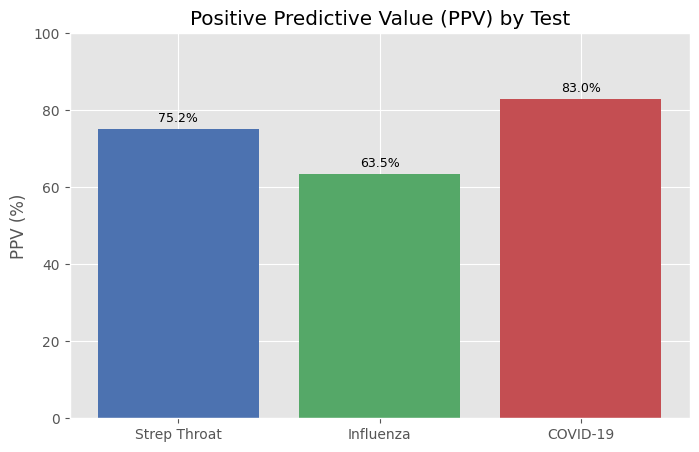

,Disease,Sensitivity,Specificity,Prevalence,PPV (%)
0,Strep Throat,86,95.0,15,75.2
1,Influenza,60,97.0,8,63.5
2,COVID-19,65,99.3,5,83.0


In [2]:
# Compute PPV for strep throat, influenza, and COVID-19 and plot results
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Choose a plotting style with a graceful fallback if a style isn't available
try:
    available = plt.style.available
    if 'seaborn-whitegrid' in available:
        plt.style.use('seaborn-whitegrid')
    elif 'seaborn' in available:
        plt.style.use('seaborn')
    elif 'ggplot' in available:
        plt.style.use('ggplot')
    else:
        plt.style.use('default')
except Exception:
    # If style selection raises for any reason, fall back to default
    try:
        plt.style.use('default')
    except Exception:
        pass


def _to_prop(x):
    """Convert a percentage (e.g., 85) or proportion (0.85) to a proportion."""
    try:
        x = float(x)
    except Exception:
        return x
    return x / 100.0 if x > 1 else x


def compute_ppv(sensitivity, specificity, prevalence):
    """Compute Positive Predictive Value using Bayes' theorem.

    All inputs may be given as percentages (e.g. 85) or proportions (0.85).
    Returns a proportion between 0 and 1, or NaN if the denominator is zero.
    """
    s = _to_prop(sensitivity)
    sp = _to_prop(specificity)
    p = _to_prop(prevalence)
    denom = (s * p) + ((1 - sp) * (1 - p))
    if denom == 0:
        return float('nan')
    return (s * p) / denom

# Provide the test parameters (you can edit these values)
parameters = [
    {"Disease": "Strep Throat", "Sensitivity": 86, "Specificity": 95, "Prevalence": 15},
    {"Disease": "Influenza", "Sensitivity": 60, "Specificity": 97, "Prevalence": 8},
    {"Disease": "COVID-19", "Sensitivity": 65, "Specificity": 99.3, "Prevalence": 5},
]

# Build DataFrame and compute PPV
df = pd.DataFrame(parameters)
df['PPV'] = df.apply(lambda r: compute_ppv(r['Sensitivity'], r['Specificity'], r['Prevalence']), axis=1)
df['PPV_percent'] = (df['PPV'] * 100).round(1)

# Plot a bar chart of PPV
try:
    fig, ax = plt.subplots(figsize=(8, 5))
    colors = ['#4C72B0', '#55A868', '#C44E52']
    bars = ax.bar(df['Disease'], df['PPV_percent'], color=colors)
    ax.set_ylabel('PPV (%)')
    ax.set_ylim(0, 100)
    ax.set_title('Positive Predictive Value (PPV) by Test')

    # Annotate bars with PPV values
    for bar, val in zip(bars, df['PPV_percent']):
        ax.text(bar.get_x() + bar.get_width() / 2, val + 1, f'{val}%', ha='center', va='bottom', fontsize=9)

    plt.show()
except Exception as e:
    # If plotting fails in this environment, print values instead
    print('Plotting failed:', e)
    print(df[['Disease', 'PPV_percent']])

# Display the parameters and computed PPV
display_df = df[['Disease', 'Sensitivity', 'Specificity', 'Prevalence', 'PPV_percent']].rename(columns={'PPV_percent': 'PPV (%)'})

# Show the results table
display(display_df)


## Analysis and Conclusion

As we see from the graph, the COVID-19 test has an 83% PPV, strep throat at 75.2%, and influenza at 63.5%. This is an important topic to talk about because imagine you're the person who got falsely diagnosed and ends up in a more fatal position. These tests have a low PPV from when the research said 95% was low. We also know these are rapid tests, so they are meant to get a result as fast as possible. Next study, we'll find the PPV of tests that are tested in actual labs in detail. Thank you for reading!